In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
cd /content/gdrive/MyDrive/Colab Notebooks/Kaggle 필사/Binary classification_Tabular data/Titanic Machine Learning from Disaster

/content/gdrive/MyDrive/Colab Notebooks/Kaggle 필사/Binary classification_Tabular data/Titanic Machine Learning from Disaster


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib의 기본 scheme 대신에 seaborn scheme, font setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings; warnings.filterwarnings('ignore')

%matplotlib inline

### 프로세스
1. 데이터셋 확인
    - 대부분의 캐글 데이터들은 잘 정제되어 있으나, 가끔 null data 가 존재하기 때문에 이를 확인하고 향후 수정
2. 탐색적 데이터 분석(EDA)
    - 여러 feature 들을 개별적으로 분석하고, feature들 간의 상관관계를 확인한다. 여러 시각화 툴을 사용하여 insight를 얻는다.
3. feature engineering
    - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering한다. 
    - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등
4. model 만들기
    - sklearn을 사용해 모델을 구성한다. (tensorflow, pytorch 도 물론 가능)
5. 모델 학습 및 예측 
    - train set을 이용하여 모델을 학습시킨 후 test을 이용해 예측한다.
6. 모델 평가
    - 예측 성능이 원하는 수준인지를 판단한다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라지기 때문에 학습된 모델이 어떤 것을 학습하였는지를 확인한다.

# 1. 데이터셋 확인

In [4]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- passengerId와 다른 **count**값을 나타내는 feature 항목이 존재한다.
    - null data가 존재하는 열이 있다고 판단할 수 있다.
    - 시각화 해보자

## 1.1 Null Data Check

In [8]:
for col in df_train.columns:
  msg = "column: {:10}\t Percent of NaN value: {:.2f}%".\
format(col, 100 * (df_train[col].isnull().sum() 
/ df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Survived  	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 19.87%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.00%
column: Cabin     	 Percent of NaN value: 77.10%
column: Embarked  	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
  msg = 'column: {:10}\t Percent of NaN value: {:.2f}%'.\
format(col, 100 * (df_test[col].isnull().sum()
/ df_test[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 20.57%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.24%
column: Cabin     	 Percent of NaN value: 78.23%
column: Embarked  	 Percent of NaN value: 0.00%


- Train, Test set에서 Age(둘 다 약 20%), Cabin(둘 다 약 80%), Embarked(Train만 0.22%)의 null data가 존재하는 것을 볼 수 있다.
- MANO라는 라이브러리를 활용하면 null data의 존재를 더 쉽게 볼 수 있다.

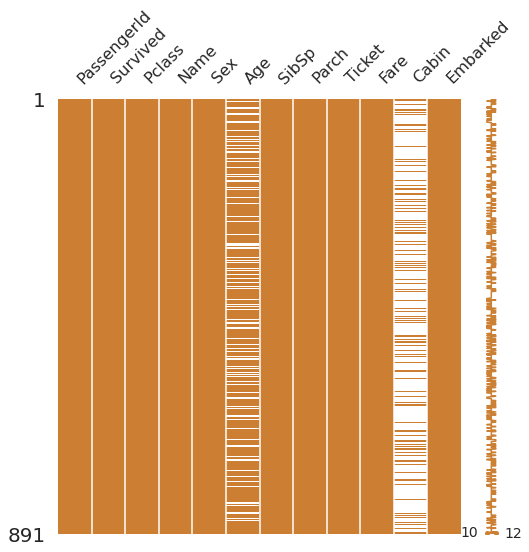

In [10]:
msno.matrix(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

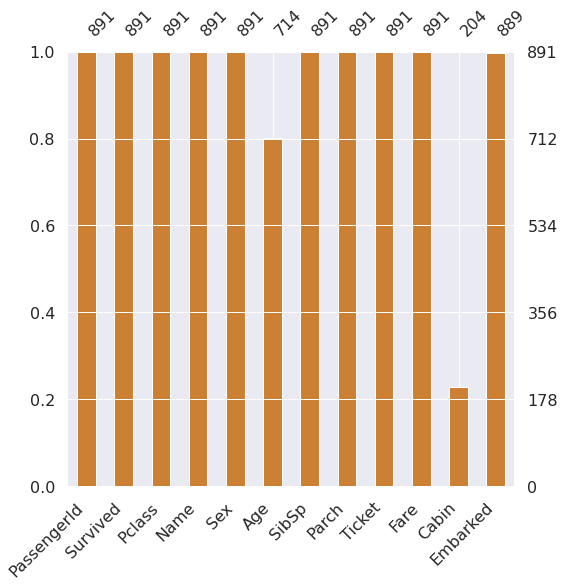

In [11]:
msno.bar(df = df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

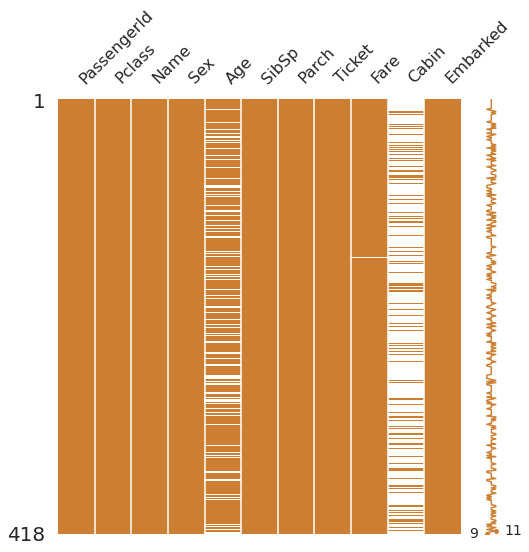

In [12]:
msno.matrix(df = df_test.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

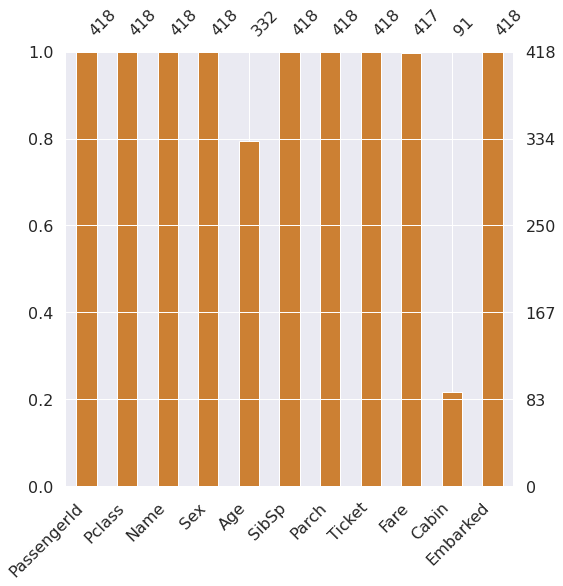

In [13]:
msno.bar(df = df_test.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

## 1.2 Target label 확인

- target label이 어떤 distribution을 가지고 있는지를 확인해봐야 한다. 
- 같은 binary classification 문제의 경우에는 1과 0의 분포가 어떤지에 따라 모델의 평가 방법이 달라질 수 있다.
  - 치우쳐진 것은 아닌지.. 뭐 이런거 말하는 듯.

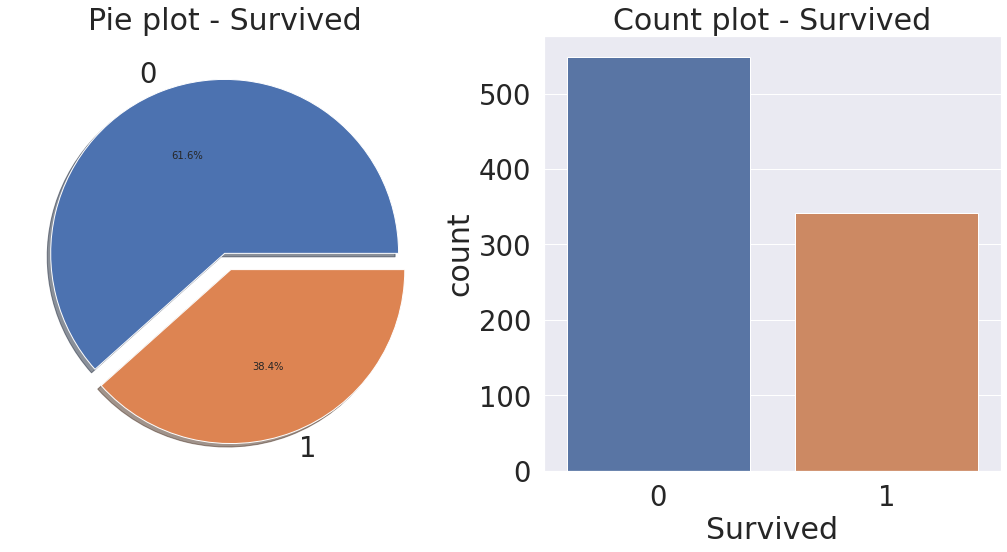

In [14]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                             autopct = '%1.1f%%',
                                             ax = ax[0],
                                             shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 안타깝게도 죽은 사람이 많다.
- 38.4%가 살아남았다.
- Target label의 분포가 꽤 균일한 편이다. 불균일한 경우에는 accuracy로 성능 평가하는 것이 매우 부적합하니 recall 등 다른 평가 방법을 도입해야 한다.

# 2. Exploratory Data Analysis

## 2.1 Pclass

- Pclass
  - ordinal(카테고리, 순서가 있다.)
- 엑셀의 pivot chart와 유사한 작업을 하는 groupby가 있고, pivot이라는 메소드도 존재한다.
  - 'Pclass', 'Survived'를 가져온 후 pclass로 묶는다. 
  - 그러면 각 Pclass마다 0, 1이 count가 되는데, 이를 평균내면 각 pclass 별 생존률을 계산할 수 있다
  - 아래와 같이 count()를 하면 각 class에 몇 명이 있는지 확인할 수 있으며, sum()을 하면 216명 중 생존한(survived == 1) 사람의 총합을 얻을 수 있다.

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas의 crosstab을 사용하면 좀 더 위 과정을 수월하게 볼 수 있다.

In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins = True).style.background_gradient(cmap = 'Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스 별 생존률을 얻을 수 있다.

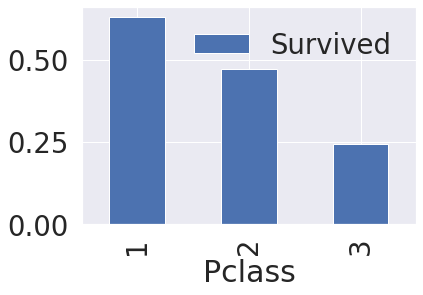

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True)\
.mean().sort_values(by = 'Survived', ascending = False).plot.bar()

- Pclass가 높을수록 생존률이 높은 것을 확인할 수 있다.
- 좀 더 보기 쉽게 그래프를 그려보자.

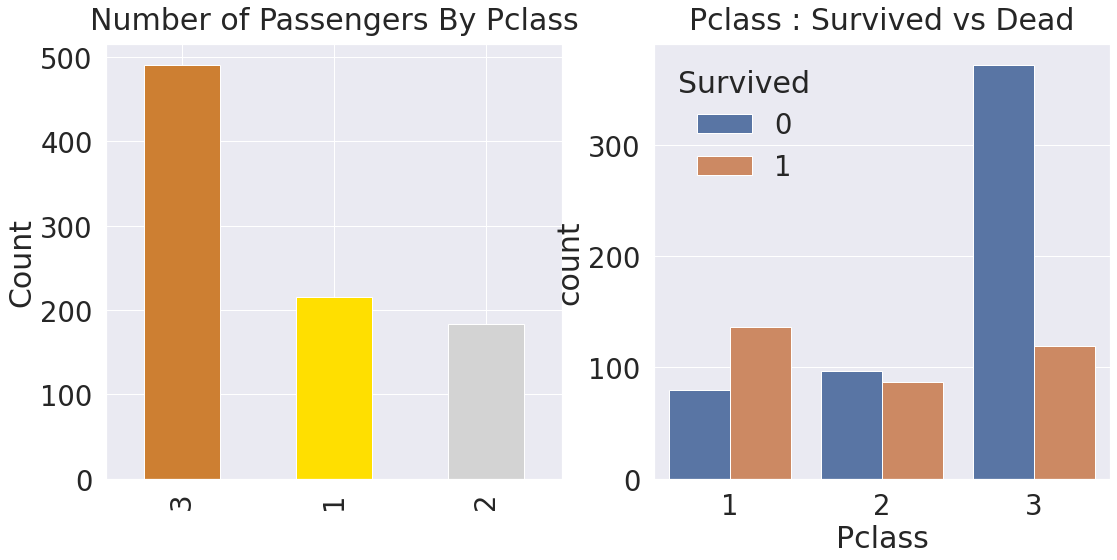

In [19]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32',\
  '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()


- 클래스가 높을수록 생존 확률이 높은 것을 확인할 수 있다.
  - Pclass 1 : 63%
  - Pclass 2 : 48%
  - Pclass 3 : 25%
- 우리는 **생존에 Pclass가 큰 영향**을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있다.

## 2.2 Sex

- 이번에는 성별에 따른 생존률을 살펴보자

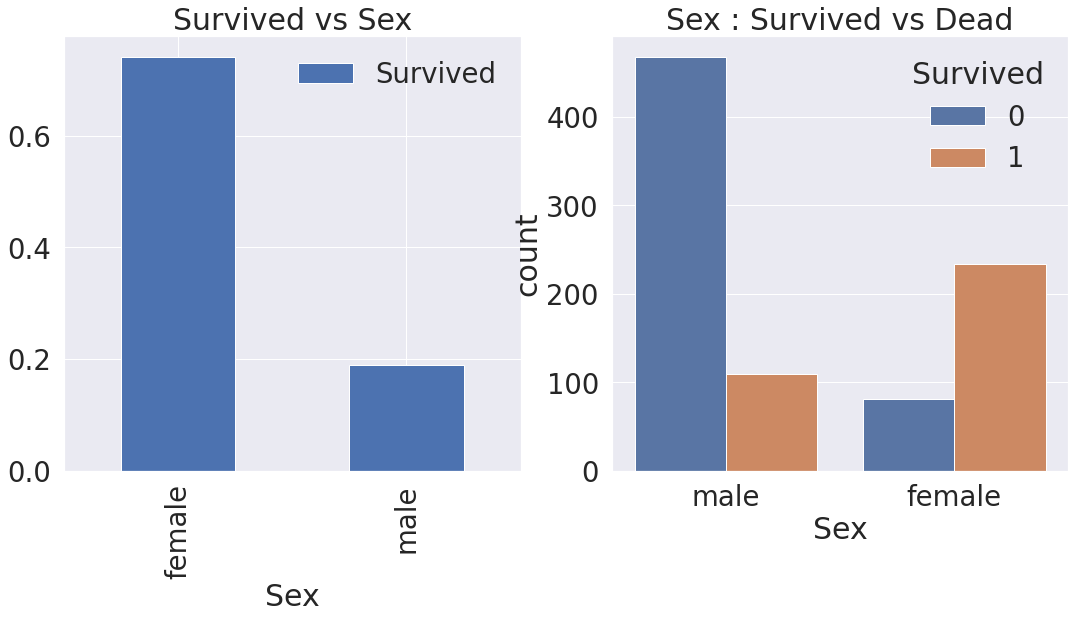

In [20]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).\
  mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

- 여성의 생존률이 남성의 생존률보다 높은 것을 확인할 수 있다.

In [21]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).\
  mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).\
  style.background_gradient(cmap = 'Blues')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있다.

## 2.3 Both Sex and Pclass

- 이번에는 Sex, Pclass 두 가지에 대하여 생존이 어떻게 달라지는지를 확인해 보자.
- seaborn의 **factorplot**을 이용하면, 손쉽게 3개의 차원으로 이루어진 그림을 그릴 수 있다.


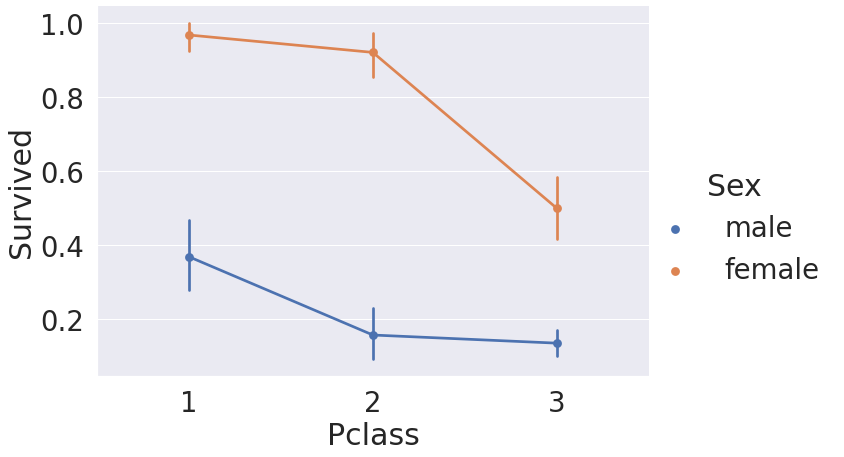

In [23]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', 
               data = df_train, size = 6, aspect = 1.5)

- 모든 클래스에서 female이 살 확률이 male보다 높은 것을 확인할 수 있다.
- 또한 남자, 여자 상관없이 클래스가 높을수록 살 확률이 높다는 것을 확인할 수 있다.

- hue 대신 column으로 하면 아래와 같이 나오는 것을 확인할 수 있다.

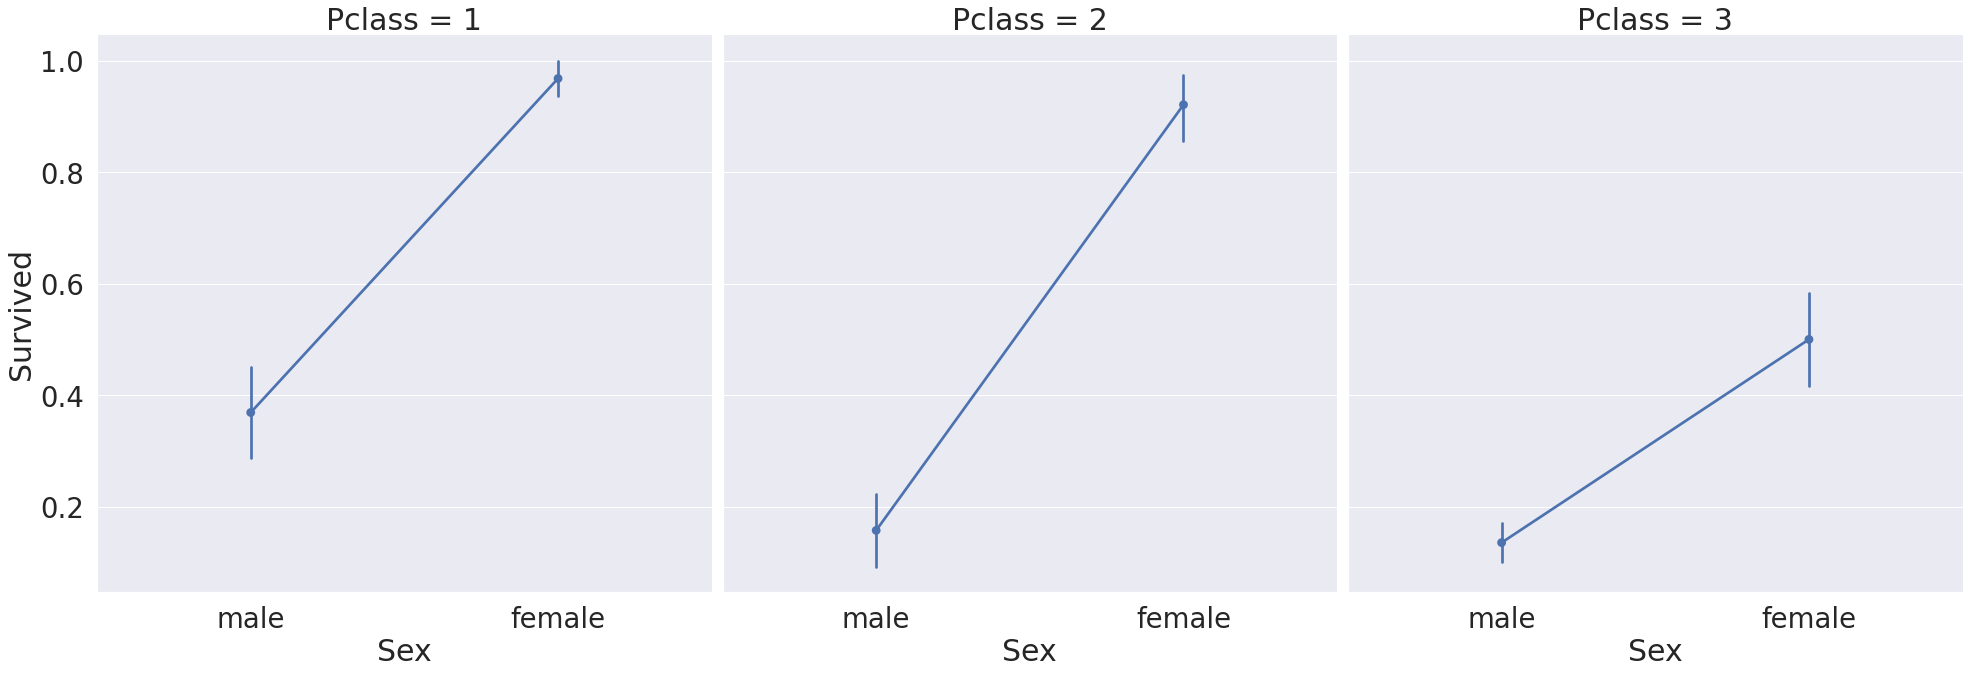

In [24]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', 
               data = df_train, satureation = .5, size = 9, aspect = 1)

## 2.4 Age

- 이번에는 나이에 따른 생존률을 살펴보자

In [25]:
print("제일 나이 많은 탑승객 : {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객 : {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 Histogram (kde, 커널 밀도 추정 사용)

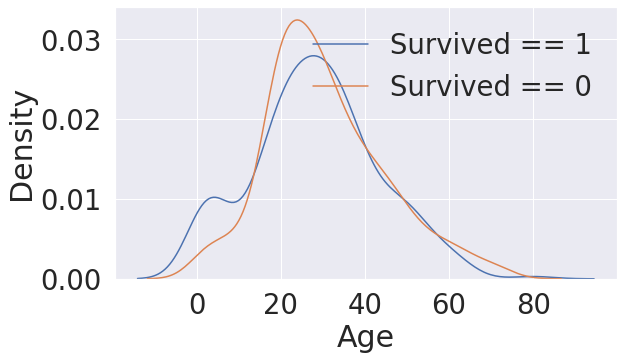

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax) # 생존한 사람 나이
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()


- 생존자 중 나이가 어린 경우가 많은 것을 확인할 수 있다.

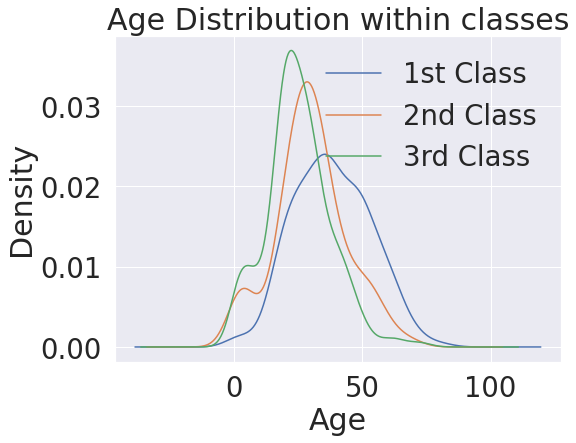

In [27]:
# Age distribution with classes
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


- Class가 높을수록 나이 많은 사람의 비중이 커진다.
- 나이대가 변하면서 생존률이 어떻게 되는지를 보기 위해서 나이 범위를 넓혀보자.

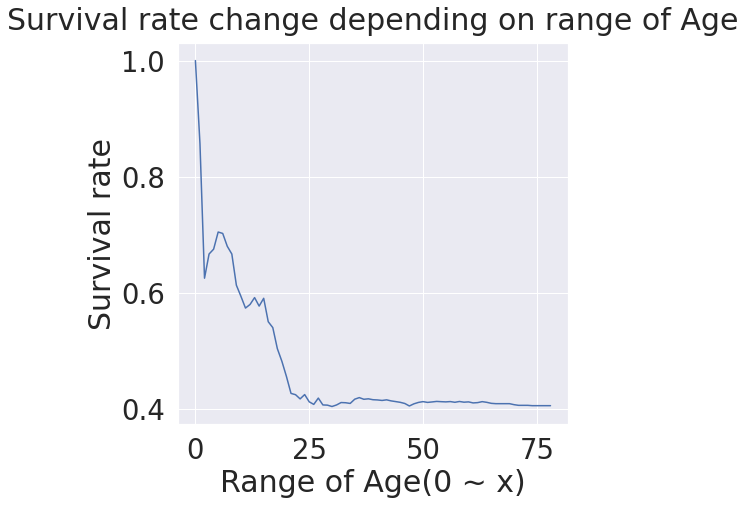

In [28]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0 ~ x)')
plt.show()

- 비율로 보았을 때 나이가 어릴수록 생존률이 높은 것을 확연히 알 수 있다.
- 나이가 중요한 feature로 쓰일 수 있음을 확인하였다.

## 2.5 Pclass, Sex, Age

- 지금까지 본 Pclass, Sex, Age 그리고 Survived 모두에 대해서 한 눈에 보고 싶다
  - 이를 쉽게 그려주는 것이 seaborn의 violinplot이다.
- x축은 우리가 각각의 case(Pclass, Sex)를 나타내고, y 축은 distribution(Age)이다.

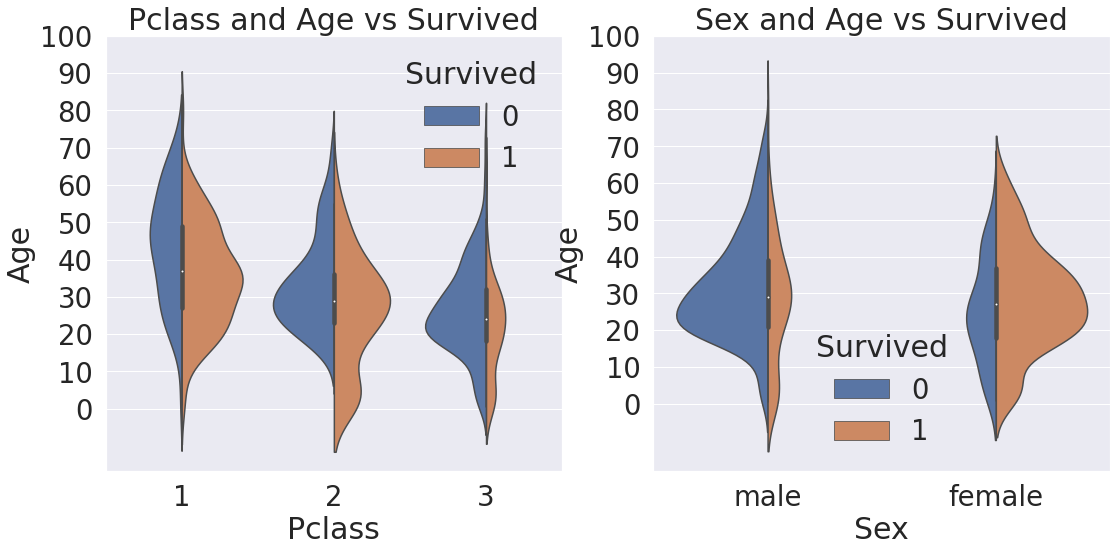

In [29]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', 
               data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = "Survived", 
               data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 왼쪽 그림은 Pclass별로 Age의 distribution이 어떻게 다른지 추가로 생존여부에 따라 구분한 그래프이다.
- 오른쪽 그림은 Sex별로 생존에 따른 distribution이 어떻게 다른지를 보여주는 그래프이다.
- 생존만 보았을 때, 모든 클래스에서 나이가 어릴수록 생존을 많이 한 것을 볼 수 있다.
- 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이한 것을 확인할 수 있다.
- 여성과 아이를 먼저 챙긴 것이라고 볼 수 있다.


## 2.6 Embarked

- Embarked는 탑승한 항구를 나타낸다.
- 위에서 한 것과 같이 탑승한 곳에 따른 생존률을 확인해보자.

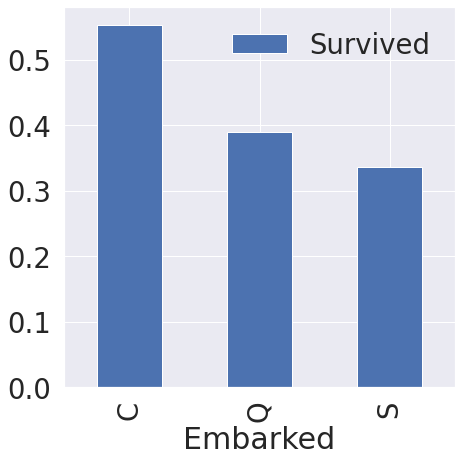

In [30]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

- C 항구에서 탑승한 승객이 생존률이 가장 높은 것을 확인할 수 있다.
- 모델에 아주 중요한 영향을 미치지는 않을 것 같으나 구분이 되기 때문에 사용하기로 하자.
- 다른 feature로 split하여 살펴보자.

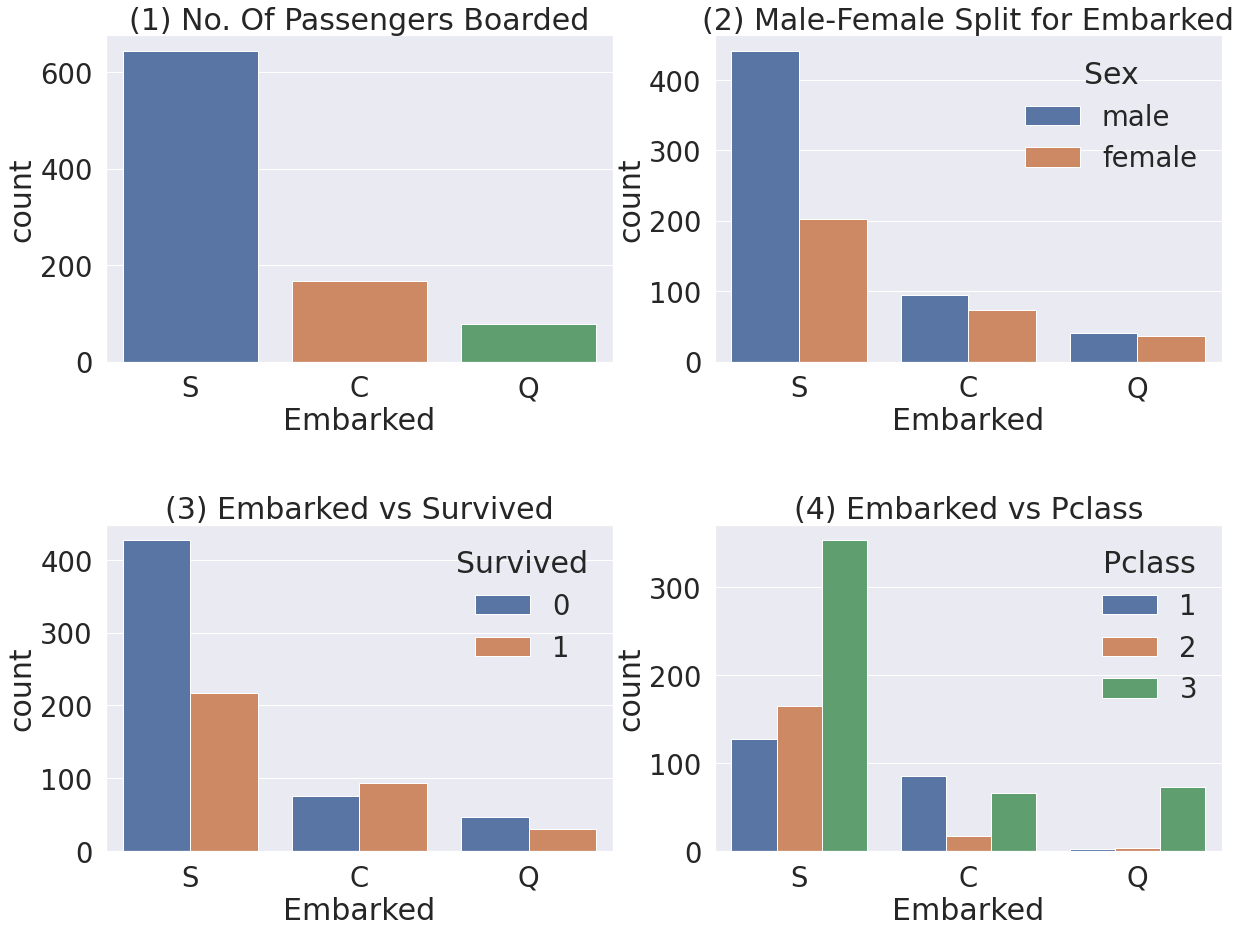

In [31]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
# 위치에 따라 이렇게 [0, 0], [0, 1], [1, 0], [1, 1] 이렇게 사용 가능 더 응용도 마찬가지.
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace =0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승하였다.
- Figure(2) - C, Q는 남녀의 비율이 비슷하지만 S에서는 남자의 비율이 2배 이상으로 많다.
- Figure(3) - 생존 확률이 S의 경우 많이 낮은 것을 확인할 수 있다.
- Figure(4) - Class로 split해서 보니 C가 생존 확률이 높은 것은 클래스가 높은 사람이 많이 타서 그런 것이다. S는 3rd Class가 많아서 생존 확률이 낮게 나온다.

```
# 코드로 형식 지정됨
```



## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

- SibSp와 Parch를 합하면 Family가 될 것이다. Family로 합쳐서 분석해보자

In [32]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함하기 위해 1 더한다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 마찬가지.


In [33]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of FAmily: ", df_train['FamilySize'].min())


Maximum size of Family:  11
Minimum size of FAmily:  1


- FamilySize와 생존률의 연관성을 살펴보자

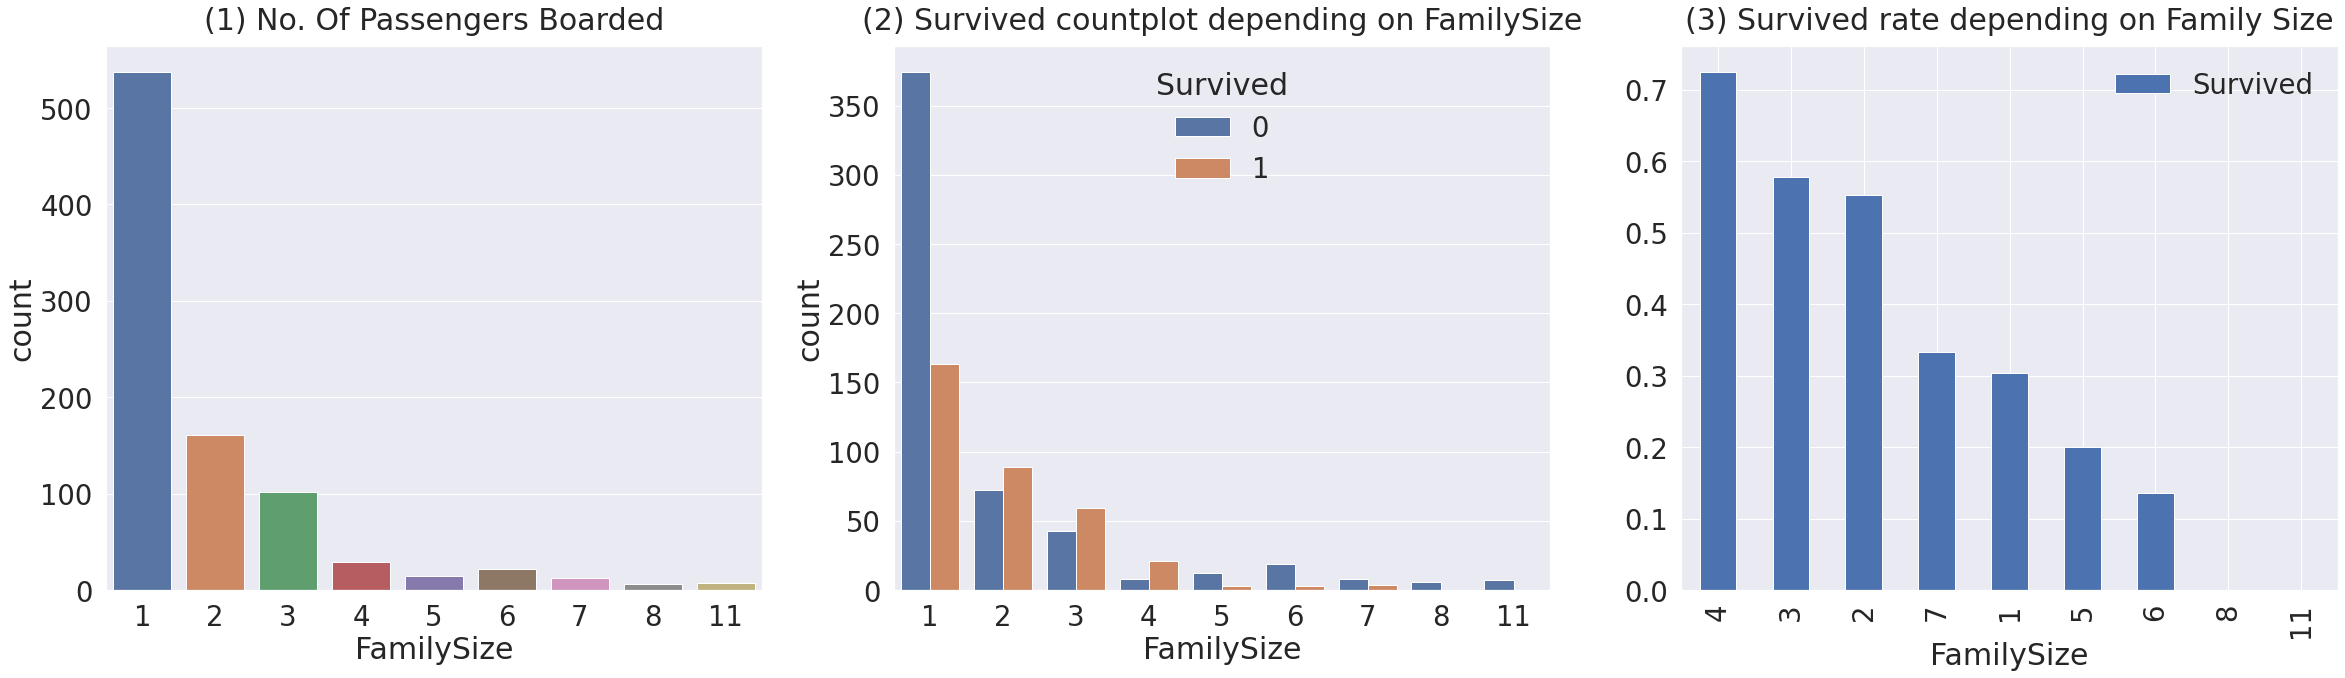

In [34]:
f, ax = plt.subplots(1, 3, figsize = (40, 10)) # 1행, 3열 plot
sns.countplot('FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()


- Figure (1) - 가족의 크기가 1 ~ 11까지 있음을 알 수 있다. 대부분 1명이고 그 다음으로 2, 3, 4 순으로 많다.
- Figure (2), (3) - 가족의 크기에 따른 생존 비교이다. 가족이 4명인 경우가 가장 생존 확률이 높다. 가족 수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 낮다. 2~4명으로 구성된 가족의 경우가 생존 확률이 높은 것을 확인할 수 있다.

## 2.8 Fare

- Fare는 탑승 요금이며, continuous feature이다. histogram을 그려보자.

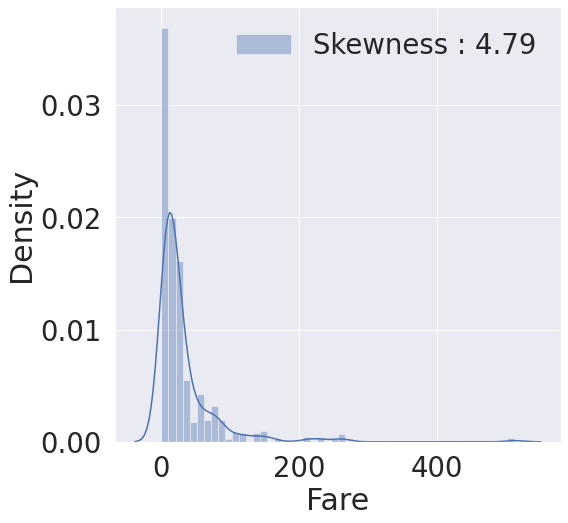

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.\
                 format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

- distribution이 매우 비대칭적인 것을 확인할 수 있다.(High Skewness) 
  - 이대로 모델에 넣어준다면 outlier에 대해서 민감하게 반응하여 실제 예측 시에 좋지 않은 결과가 발생할 수 있다.
- Outlier의 영향을 줄이기 위해 Fare에 log를 취한다.
- **DataFrame의 특정 column에 공통된 작업을 적용하고 싶다면 map, apply를 이용하여 손쉽게 적용 가능하다.** map(int, input().split()) 이런 식으로 해서 입력받은 것을 전부 int로 넣는 것과 비슷한 맥락
- Fare의 데이터를 모두 log를 취해야 하는데 lambda 함수를 이용하여 map함수에 인수로 넣어주면 적용하기 쉽다.(*반드시 숙지*)

In [36]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # test set에 있는 nan value를 평균값으로 변경

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

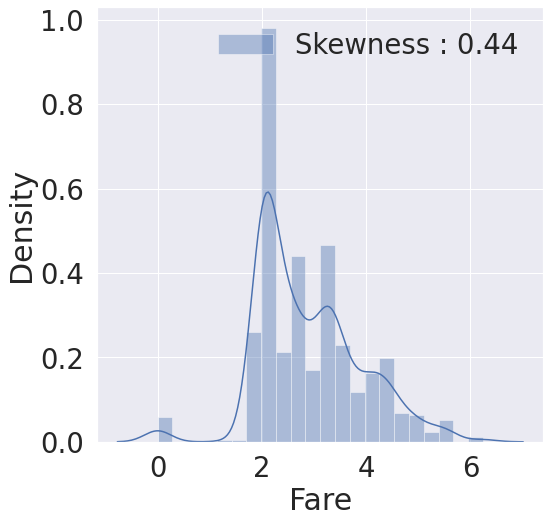

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
# DataFrame의 .skew() : 요청한 축에 대한 편향을 반환.
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')



- log를 취하니 비대칭성이 많이 사라진 것을 확인할 수 있다.
- 이런 작업을 통해 모델이 좀 더 나은 성능을 발휘하도록 만들 수 있다.
- 이런 것은 feature engineering에 들어가는 작업이다.

## 2.9 Cabin

- 이 feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않으므로 모델에 포함시키지 않기로 하였다.

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket

- 이 feature는 NaN은 없다. 그러나 string data이므로 어떤 작업을 해주어야 모델에 사용할 수 있다. 이를 위해 아이디어가 필요하다.

In [39]:
df_train['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
3101295     6
347088      6
           ..
345774      1
349249      1
336439      1
347743      1
3101267     1
Name: Ticket, Length: 681, dtype: int64

- Ticket number는 매우 다양하다. 여기서 어떤 특징을 이끌어내서 생존과 연관시킬 수 있는지 고민해보자.

[출처] : https://kaggle-kr.tistory.com/17?category=868316